<h1 align="center"> Examen parcial curso Computer Vision - MIA-UNI CICLO III</h1>


---

### Título:  Blood Vessel Segmentation in Retinal Images

### Objetivo: Desarrollar un algoritmo de visión artificial que pueda segmentar con precisión los vasos sanguíneos en imágenes retinianas. Esto se realizará mediante métodos de segmentación tradicionales.


### Grupo 7
Integrantes:


* Aradiel Castañeda, Hilario  
* Meza Rodriguez, Moises
* García Atuncar, Fernando
* Estacio Sanchez, Deiby

***

# Desarrollo del exámen

Para cumplir con el objetivo de segmentar las imágenes de retina, trabajaremos usando la metodología CRISP-DM para analizar la data de las imágenes.
Los pasos a seguir:

1. Entendimiento del negocio
2. Entendimiento de la data
3. Preparación de la data
4. Modelamiento (segmentación)
5. Evaluación (benchmarking)
6. Despliegue (exportar el modelo y las imágenes segmentadas)

<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" alt="Descripción" width="550"/>
</p>


## 1.  Entendimiento del negocio

<p align="center">
    <img src="https://public.grand-challenge-user-content.org/b/210/drive.x10.jpeg" alt="Descripción" width="650"/>
</p>

<p align="center">
    <img src="https://public.grand-challenge-user-content.org/i/2020/01/21/75d803ef.png" alt="Descripción" width="650"/>
</p>


<p align="center">Fuente <a href="https://drive.grand-challenge.org/" target="_blank">gran-challenge</a>
</p>

La base de datos DRIVE (Digital Retinal Images for Vessel Extraction) es un conjunto de imágenes retinianas diseñado específicamente para la segmentación de vasos sanguíneos en imágenes del fondo de ojo. Fue publicada en el año 2004 y contiene un total de 40 imágenes a color de retina: 20 para entrenamiento y 20 para prueba, cada una acompañada de segmentaciones manuales realizadas por expertos. Las imágenes fueron obtenidas como parte de un programa de cribado de diabetes en los Países Bajos, utilizando una cámara Canon CR5 no midriática con un ángulo de 45 grados.

El objetivo principal del challenge asociado a la base de datos DRIVE es proporcionar un punto de referencia estandarizado para comparar algoritmos de segmentación de vasos retinianos. Este tipo de segmentación es crucial para el diagnóstico automatizado de enfermedades oculares como la retinopatía diabética e hipertensiva. Al ofrecer imágenes con segmentaciones manuales de referencia (ground truth), la base facilita la evaluación objetiva del rendimiento de algoritmos de procesamiento de imágenes médicas y deep learning.

Se seleccionaron cuarenta fotografías al azar; 33 no muestran signos de retinopatía diabética y 7 muestran signos de retinopatía diabética temprana leve. A continuación, se presenta una breve descripción de las anomalías en estos 7 casos:

- 25_entrenamiento: alteraciones del epitelio pigmentario, probablemente maculopatía en mariposa con cicatriz pigmentada en la fóvea o coroidopatía; sin retinopatía diabética ni otras anomalías vasculares.
- 26_entrenamiento: retinopatía diabética de base, atrofia del epitelio pigmentario, atrofia alrededor del disco óptico.
- 32_entrenamiento: retinopatía diabética de base.

- 03_prueba: retinopatía diabética de base.
- 08_prueba: alteraciones del epitelio pigmentario, cicatriz pigmentada en la fóvea o coroidopatía; sin retinopatía diabética ni otras anomalías vasculares.
- 14_prueba: retinopatía diabética de base.
- 17_prueba: retinopatía diabética de base.

## 2. Entendimiento de la data

Procederemos a descargar la base de datos y descomprimir en el folder llamado ./DATASET. Luego de ello verificamos que las imágenes tienen extensión .tif, por ello remos opencv para leer estas imágenes y hacer un EDA.

### 2.1 Importamos las librerías a usar

In [259]:
import glob               # buscar archivos con patrones
import numpy as np        # cálculo numérico con arreglos
import matplotlib.pyplot as plt  # generación de gráficos
import cv2                # procesamiento de imágenes con OpenCV
import skimage as ski     # algoritmos para procesamiento de imágenes
from scipy import ndimage as ndi  # operaciones de imágenes multidimensionales
import os         # manipulación de rutas y archivos
import pandas as pd       # manipulación de datos en forma de tablas
from PIL import Image
import tqdm  # barra de progreso para iteraciones

### 2.2 Creamos una lista con las direcciones de todas las imágenes 


La estructura del folder DATASET es lo siguiente:

![](./imgs/tree_folder_dataset.png)

In [3]:
!pwd

/mnt/e/MIA-UNI/CV


In [4]:
path = "DATASET"  # ruta de la carpeta principal

train_dir_imgs = glob.glob(os.path.join(path, "training", "training", "images", "*.tif"), recursive=True)  # lista archivos .tif recursivamente
test_dir_imgs = glob.glob(os.path.join(path, "test","test",  "**", "*.tif"), recursive=True)  # lista archivos .tif recursivamente

print("Total de imagenes en el dataset:", len(train_dir_imgs) + len(test_dir_imgs))  # número total de archivos

print("\n*********************************\n")

print("Número de imágenes en el directorio de entrenamiento:", len(train_dir_imgs))  # número total de archivos
print("\tRuta de los 2 primeras imágenes",train_dir_imgs[0],train_dir_imgs[-1])  # muestra las 2 primeras rutas
print("\tTamaño de dir_imgs", len(train_dir_imgs))  # muestra número total de archivos
print("\tTipo de img", type(train_dir_imgs))  # muestra tipo de la variable

print("\n*********************************\n")

print("Número de imágenes en el directorio de test:", len(test_dir_imgs))  # número total de archivos
print("\tRuta de los 2 primeras imágenes",test_dir_imgs[0],test_dir_imgs[-1])  # muestra las 2 primeras rutas
print("\tTamaño de test_dir_imgs", len(test_dir_imgs))  # muestra número total
print("\tTipo de img", type(test_dir_imgs))  # muestra tipo de la variable


Total de imagenes en el dataset: 40

*********************************

Número de imágenes en el directorio de entrenamiento: 20
	Ruta de los 2 primeras imágenes DATASET/training/training/images/21_training.tif DATASET/training/training/images/40_training.tif
	Tamaño de dir_imgs 20
	Tipo de img <class 'list'>

*********************************

Número de imágenes en el directorio de test: 20
	Ruta de los 2 primeras imágenes DATASET/test/test/images/01_test.tif DATASET/test/test/images/20_test.tif
	Tamaño de test_dir_imgs 20
	Tipo de img <class 'list'>


### 2.3 Graficamos imagenes aleatorias para verificar su contenido

(np.float64(-0.5), np.float64(564.5), np.float64(583.5), np.float64(-0.5))

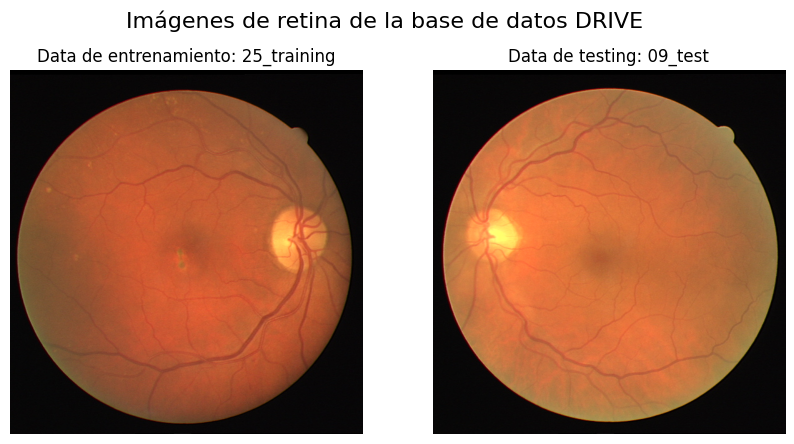

In [5]:
rand_img = np.random.randint(len(train_dir_imgs))  # índice aleatorio
name_selected = os.path.basename(train_dir_imgs[rand_img])  # nombre de la imagen seleccionada

img1 = cv2.imread(train_dir_imgs[rand_img])  # lee la imagen
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # convierte BGR a RGB

plt.figure(figsize=(10, 5))  # define tamaño de la figura
plt.suptitle("Imágenes de retina de la base de datos DRIVE", fontsize=16)  # título general

plt.subplot(1, 2, 1)  # primer subgráfico (fila 1, columna 2, posición 1)
plt.imshow(img1)  # muestra la imagen
plt.title(f"Data de entrenamiento: {name_selected[:-4]}")  # título del subgráfico
plt.axis('off')  # oculta ejes

rand_img = np.random.randint(len(test_dir_imgs))  # índice aleatorio
name_selected = os.path.basename(test_dir_imgs[rand_img])  # nombre de la imagen seleccionada

img2 = cv2.imread(test_dir_imgs[rand_img])  # lee la imagen
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # convierte BGR a RGB

plt.subplot(1, 2, 2)  # segundo subgráfico (fila 1, columna 2, posición 2)
plt.imshow(img2)  # muestra la imagen
plt.title(f"Data de testing: {name_selected[:-4]}")  # título del subgráfico
plt.axis('off')  # oculta ejes

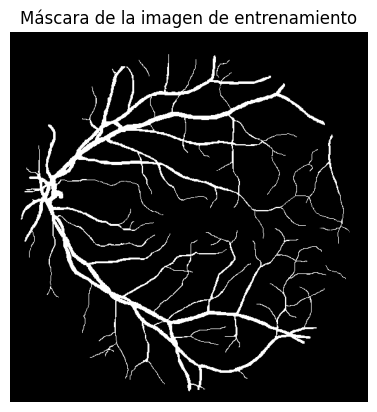

In [30]:
train_dir_masks = glob.glob(os.path.join(path, "training", "training", "1st_manual", "*.gif"), recursive=True) 

# Cargar imágenes binarias (0 y 255)
gif = Image.open(train_dir_masks[0]) #cv2.imread(dir_real_segmented[0], cv2.IMREAD_GRAYSCALE)
# Extraer todos los frames
frames = []
try:
    while True:
        frame = gif.copy().convert("RGB")  # Convertir a RGB
        frames.append(np.array(frame))
        gif.seek(gif.tell() + 1)
except EOFError:
    pass

gt = cv2.cvtColor(frames[0], cv2.IMREAD_GRAYSCALE)[:, :, 0]

plt.imshow(gt, cmap='gray')
plt.title("Máscara de la imagen de entrenamiento")
plt.axis('off')
plt.show()

### 2.4 Verificamos el tamaño de las imagenes 

Vemos que las imagenes de entrenamiento y test son de 584x565 pixeles de 3 canales RGB

In [6]:
print("Tamaño de la imagen de entrenamiento :",img1.shape)
print("Tamaño de la imagen de testeo :",img2.shape)

Tamaño de la imagen de entrenamiento : (584, 565, 3)
Tamaño de la imagen de testeo : (584, 565, 3)


## 3. Preparación de la data

Para facilitar la ubicación de las imagenes con su mascara, crearemos 2 nuevos folders donde pondremos las imagenes en escala de grises. El nombre de estos folders se llamara **images_gris**

La nueva estructura del folder DATASET es lo siguiente:

![](./imgs/tree_folder_dataset2.png)

### 3.1 Creación de folder con imagenes en gris

In [22]:
# Crear directorios para almacenar imágenes en escala de grises
if os.path.exists(os.path.join(path, "training", "training", "images_gris")):
    print("TRAIN: La carpeta de imágenes en escala de grises ya existe.")
else:
    os.makedirs(os.path.join(path, "training", "training", "images_gris"))

if os.path.exists(os.path.join(path, "test", "test", "images_gris")):
    print("TEST: La carpeta de imágenes en escala de grises ya existe.")
else:
    os.makedirs(os.path.join(path, "test", "test", "images_gris"))

TRAIN: La carpeta de imágenes en escala de grises ya existe.
TEST: La carpeta de imágenes en escala de grises ya existe.


In [7]:
# Para la data de entrenamiento:
PATH1 = os.path.join(path, "training", "training", "images_gris")  # ruta de las imágenes en escala de grises
for i in range(len(train_dir_imgs)):
    img_aux = cv2.imread(train_dir_imgs[i])  # lee la imagen
    img_aux = cv2.cvtColor(img_aux, cv2.COLOR_BGR2GRAY)  # convierte a escala de grises
    cv2.imwrite(os.path.join(PATH1, os.path.basename(train_dir_imgs[i])[:-4] + ".png"), img_aux)

# Para la data de test:
PATH2 = os.path.join(path, "test", "test", "images_gris")  # ruta de las imágenes en escala de grises
for i in range(len(test_dir_imgs)):
    img_aux = cv2.imread(test_dir_imgs[i])  # lee la imagen
    img_aux = cv2.cvtColor(img_aux, cv2.COLOR_BGR2GRAY)  # convierte a escala de grises
    cv2.imwrite(os.path.join(PATH2, os.path.basename(test_dir_imgs[i])[:-4] + ".png"), img_aux)

### 3.2 Creación de folder con las mascaras en png

In [23]:
# Crear directorios para almacenar máscaras en png
if os.path.exists(os.path.join(path, "training", "training", "mask_png")):
    print("TRAIN: La carpeta de máscaras en formato PNG ya existe.")
else:
    os.makedirs(os.path.join(path, "training", "training", "mask_png"))

if os.path.exists(os.path.join(path, "test", "test", "mask_png")):
    print("TEST: La carpeta de máscaras en formato PNG ya existe.")
else:
    os.makedirs(os.path.join(path, "test", "test", "mask_png"))

TRAIN: La carpeta de máscaras en formato PNG ya existe.
TEST: La carpeta de máscaras en formato PNG ya existe.


Solo lo trabajamos con la data de entrenamiento ya que tiene las mascaras en el datasets

In [31]:
# Para la data de entrenamiento:
PATH_MASKS = os.path.join(path, "training", "training", "mask_png")  # ruta de las máscaras en formato PNG

#train_dir_masks = glob.glob(os.path.join(path, "training", "training", "1st_manual", "*.gif"), recursive=True) 

for i in range(len(train_dir_masks)):
    # Cargar imágenes binarias (0 y 255)
    gif = Image.open(train_dir_masks[i]) #cv2.imread(dir_real_segmented[0], cv2.IMREAD_GRAYSCALE)
    # Extraer todos los frames
    frames = []
    try:
        while True:
            frame = gif.copy().convert("RGB")  # Convertir a RGB
            frames.append(np.array(frame))
            gif.seek(gif.tell() + 1)
    except EOFError:
        pass

    gt = cv2.cvtColor(frames[0], cv2.IMREAD_GRAYSCALE)[:, :, 0]
    #img_aux = cv2.imread(test_dir_imgs[i])  # lee la imagen
    #img_aux = cv2.cvtColor(img_aux, cv2.COLOR_BGR2GRAY)  # convierte a escala de grises
    cv2.imwrite(os.path.join(PATH_MASKS, os.path.basename(train_dir_masks[i])[:-4] + ".png"), gt)

### 3.3 Creación de dataframe con las rutas de las imagenes

In [42]:
# Creamos un dataframe para almacenar las rutas de las imágenes y sus máscaras

df = pd.DataFrame(columns=['image_path', "image_gris_path", 'mask_path'])
# Lista para almacenar los datos antes de crear el DataFrame
data_rows = []

# Agregamos las rutas de las imágenes y sus máscaras al dataframe
for img_path in train_dir_imgs:
    gris_path = img_path.replace('images', 'images_gris')  # asumiendo que las imágenes en escala de grises están en una carpeta 'images_gris'
    mask_path = img_path.replace('images', 'mask_png')  # asumiendo que las máscaras están en una carpeta 'masks'
    #df = df.append({'image_path': img_path, 'image_gris_path': gris_path[:-3]+".png",'mask_path': mask_path[:-3]+".gif"}, ignore_index=True)
    data_rows.append({
        'image_path': img_path, 
        'image_gris_path': gris_path[:-4]+".png",
        'mask_path': mask_path[:-12]+"manual1.png"
    })

# Crear el DataFrame de una vez con todos los datos
df = pd.DataFrame(data_rows)
# Mostramos el dataframe
df.head()  # muestra las primeras filas del dataframe

,image_path,image_gris_path,mask_path
0,DATASET/training/training/images/21_training.tif,DATASET/training/training/images_gris/21_train...,DATASET/training/training/mask_png/21_manual1.png
1,DATASET/training/training/images/22_training.tif,DATASET/training/training/images_gris/22_train...,DATASET/training/training/mask_png/22_manual1.png
2,DATASET/training/training/images/23_training.tif,DATASET/training/training/images_gris/23_train...,DATASET/training/training/mask_png/23_manual1.png
3,DATASET/training/training/images/24_training.tif,DATASET/training/training/images_gris/24_train...,DATASET/training/training/mask_png/24_manual1.png
4,DATASET/training/training/images/25_training.tif,DATASET/training/training/images_gris/25_train...,DATASET/training/training/mask_png/25_manual1.png


In [45]:
print("df keys", df.keys())  # muestra las claves del dataframe

df keys Index(['image_path', 'image_gris_path', 'mask_path'], dtype='object')


Ahora se puede acceder a cada imagen con el dataframe. Según los headers del dataframe:
- image_path: ruta de la imagen original
- image_gris_path: ruta de la imagen en gris
- mask_path: ruta de la mascara

Ruta de la imagen original: DATASET/training/training/images/21_training.tif


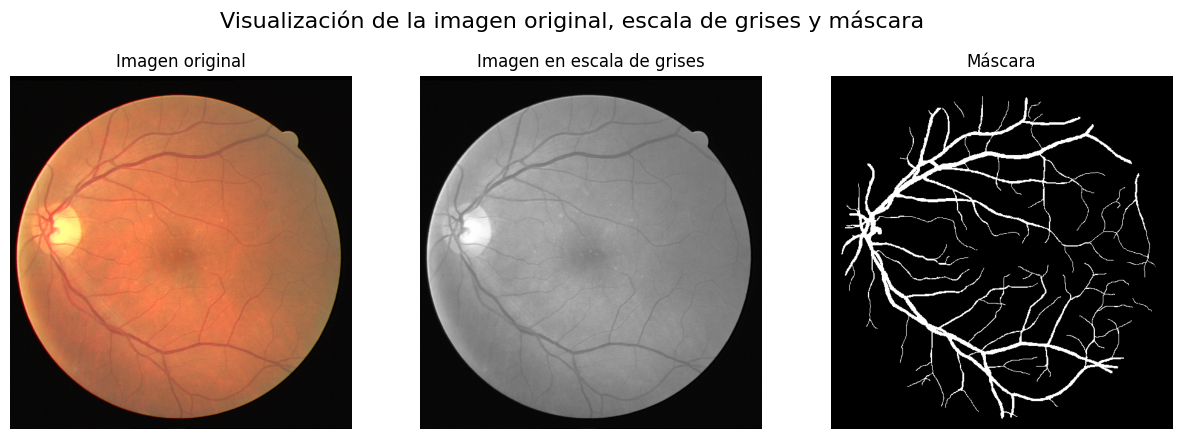

In [52]:
image_raw = df.iloc[0]['image_path']  # obtiene la ruta de la primera imagen del dataframe
image_gris = df.iloc[0]['image_gris_path']  # obtiene la ruta de la primera imagen en escala de grises
image_mask = df.iloc[0]['mask_path']  # obtiene la ruta de la máscara

print("Ruta de la imagen original:", image_raw)  # muestra la ruta de la imagen

img = cv2.imread(image_raw)  # lee la imagen de la primera fila del dataframe
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_gris = cv2.imread(image_gris, cv2.IMREAD_GRAYSCALE)  # lee la imagen en escala de grises
mask = cv2.imread(image_mask, cv2.IMREAD_GRAYSCALE)  # lee la máscara

plt.figure(figsize=(15, 5))  # define tamaño de la figura
plt.suptitle("Visualización de la imagen original, escala de grises y máscara", fontsize=16)  # título general
plt.subplot(1,3,1)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen original")

plt.subplot(1,3,2)
plt.imshow(img_gris, cmap='gray')
plt.axis('off')
plt.title("Imagen en escala de grises")

plt.subplot(1,3,3)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Máscara")

plt.show()

## 4. Modelamiento / segmentación

### 4.1 Verificamos el histograma de una imagen aleatoria

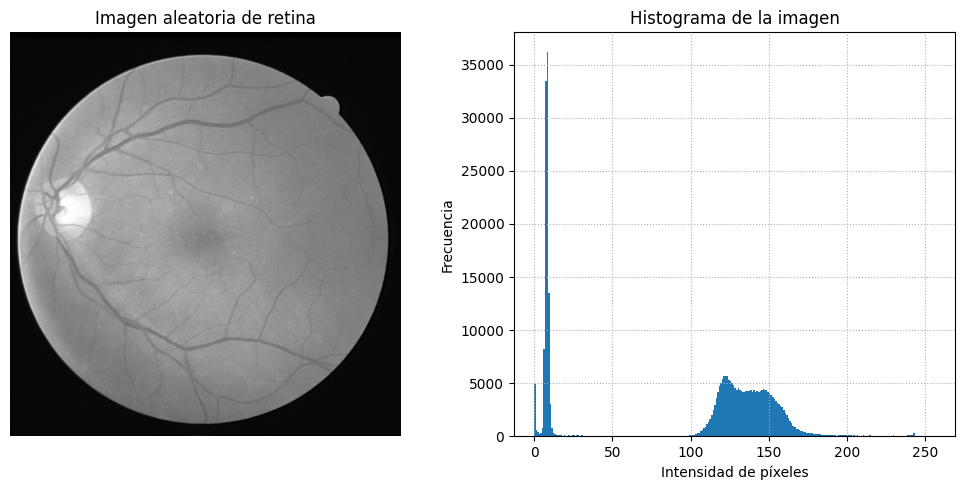

In [64]:
#rand_img = np.random.randint(df["image_gris_path"].shape[0])  # índice aleatorio
image_gris = df.iloc[0]['image_gris_path'] 

img = cv2.imread(image_gris, cv2.IMREAD_GRAYSCALE)  # lee la imagen
#img = cv2.cvtColor(img)  # convierte BGR a RGB

plt.figure(figsize=(10, 5))  # define tamaño de la figura
plt.subplot(1, 2, 1)  # primer subgráfico (fila 1, columna 2, posición 1)
plt.imshow(img, cmap='gray')  # muestra la imagen
plt.title("Imagen aleatoria de retina")  # título del subgráfico
plt.axis('off')  # oculta ejes

plt.subplot(1, 2, 2)  # segundo subgráfico (fila 1, columna 2, posición 2)
plt.title("Histograma de la imagen")  # título del subgráfico
plt.hist(img.ravel(), bins=256, range=(0, 256))  # histograma de intensidades
plt.xlabel('Intensidad de píxeles')  # etiqueta eje x
plt.ylabel('Frecuencia')  # etiqueta eje y
plt.grid(ls=":")  # cuadrícula punteada

plt.tight_layout()  # ajusta espaciado
plt.show()  # muestra la figura


### 4.2 Segmentación por el método de multiotsu

* Usamos el filtro de vasos Sato <skimage.filters.sato> para distinguir mejor los vasos principales en la imagen.

Text(0.5, 1.0, 'Máscara')

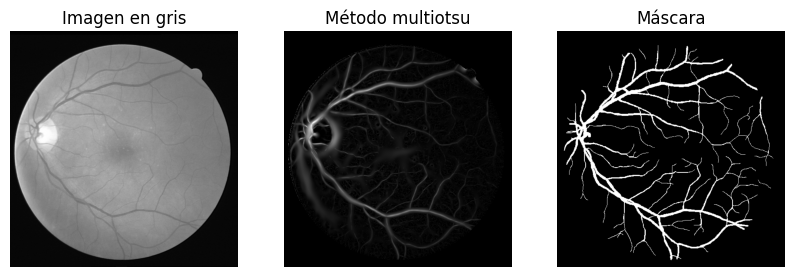

In [106]:
retina = img #ski.color.rgb2gray(img)                # convierte a escala de grises
t0, t1 = ski.filters.threshold_multiotsu(retina, classes=3)  # umbrales Otsu multiclase
mask = retina > t0                              # máscara de píxeles mayores al primer umbral
vessels = ski.filters.sato(retina, sigmas=range(1, 10)) * mask  # realza vasos y aplica máscara

# graficación
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))  # crea figura con 3 subplots
axes[0].imshow(retina, cmap='gray')           # muestra imagen en grises
axes[0].set_axis_off()                        # oculta ejes
axes[0].set_title('Imagen en gris')                # título del primer subplot

#axes[1].imshow(vessels>3.5, cmap='gray')         # muestra mapa de vesselness
axes[1].imshow(vessels, cmap='gray')         # muestra mapa de vesselness
axes[1].set_axis_off()                        # oculta ejes
axes[1].set_title('Método multiotsu')      # título del segundo subplot

image_mask = df.iloc[0]['mask_path'] 

img_mask = cv2.imread(image_mask, cv2.IMREAD_GRAYSCALE)

axes[2].imshow(img_mask, cmap='gray')         # muestra mapa de vesselness
axes[2].set_axis_off()                        # oculta ejes
axes[2].set_title('Máscara')      # título del segundo subplot


#### 4.2.1 Histograma de la segmentación

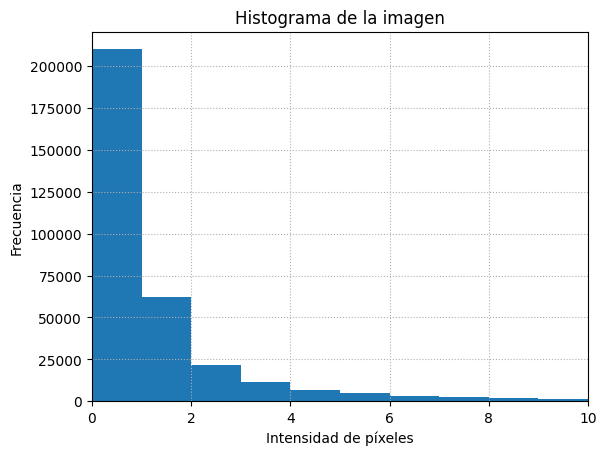

In [105]:
plt.title("Histograma de la imagen")  # título del subgráfico
plt.hist(vessels.ravel(), bins=256, range=(0, 256))  # histograma de intensidades
plt.xlabel('Intensidad de píxeles')  # etiqueta eje x
plt.ylabel('Frecuencia')  # etiqueta eje y
plt.grid(ls=":")  # cuadrícula punteada
plt.xlim(0,10)
plt.show()  # muestra la figura

#### 4.2.2 Hallando el dice score a partir de la binarización

In [ ]:
# Convertir a binario si es necesario
img1 = vessels > 3.5  # umbral para binarizar el mapa de vesselness
img2 = img_mask > 0

# Dice = 2 * |A ∩ B| / (|A| + |B|)
intersection = (img1 & img2).sum()
dice_score = 2 * intersection / (img1.sum() + img2.sum())

print("Dice score:", dice_score)

Dice score: 0.6244696287860698


Text(0.5, 1.0, 'Máscara')

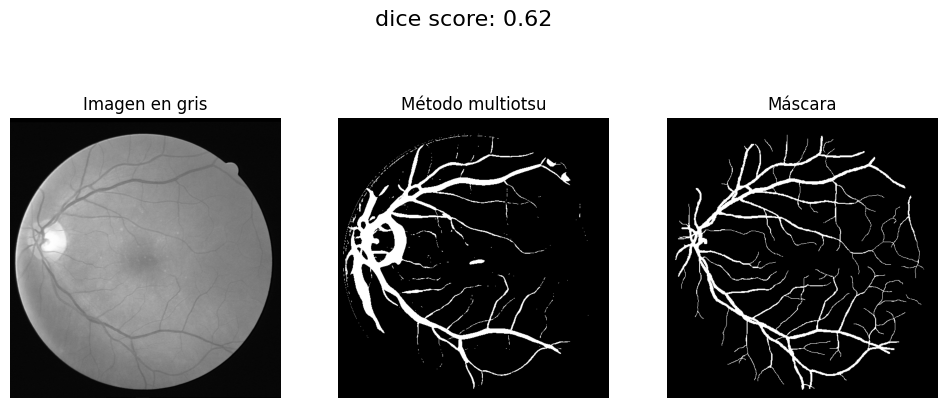

In [111]:
# graficación
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))  # crea figura con 3 subplots
plt.suptitle(f"dice score: {round(dice_score,2)}", fontsize=16)  # título general
plt.tight_layout()  # ajusta espaciado
axes[0].imshow(retina, cmap='gray')           # muestra imagen en grises
axes[0].set_axis_off()                        # oculta ejes
axes[0].set_title('Imagen en gris')                # título del primer subplot

axes[1].imshow(vessels>3.5, cmap='gray')         # muestra mapa de vesselness
axes[1].set_axis_off()                        # oculta ejes
axes[1].set_title('Método multiotsu')      # título del segundo subplot

image_mask = df.iloc[0]['mask_path'] 

img_mask = cv2.imread(image_mask, cv2.IMREAD_GRAYSCALE)

axes[2].imshow(img_mask, cmap='gray')         # muestra mapa de vesselness
axes[2].set_axis_off()                        # oculta ejes
axes[2].set_title('Máscara')      # título del segundo subplot

### 4.3 Segmentación por el método de regiones de crecimiento


In [125]:
def region_growing(image, seed, threshold=5):
    height, width = image.shape
    visited = np.zeros_like(image, dtype=bool)
    output = np.zeros_like(image, dtype=np.uint8)

    # Lista de vecinos (4-conectividad)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    region_mean = int(image[seed])
    region_size = 1

    # Inicializar cola con la semilla
    queue = [seed]
    visited[seed] = True
    output[seed] = 255

    while queue:
        y, x = queue.pop(0)

        for dy, dx in neighbors:
            ny, nx = y + dy, x + dx

            if 0 <= ny < height and 0 <= nx < width and not visited[ny, nx]:
                intensity = int(image[ny, nx])
                if abs(intensity - region_mean) < threshold:
                    queue.append((ny, nx))
                    visited[ny, nx] = True
                    output[ny, nx] = 255
                    region_size += 1
                    region_mean = (region_mean * (region_size - 1) + intensity) // region_size

    return output

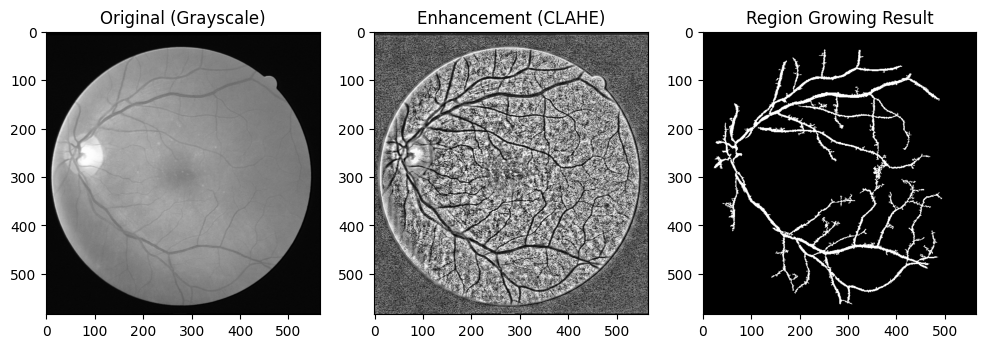

In [195]:
# Cargar la imagen
image = retina #cv2.imread('21_training.tif', cv2.IMREAD_GRAYSCALE)

# Aplicar preprocesamiento: CLAHE para mejorar contraste
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(50,50))
enhanced = clahe.apply(image)

# Definir una semilla (elige un píxel en un vaso, o hazlo automático con binarización)
seed = (290, 360)  # cambia este valor según tu imagen

# Segmentar con region growing
segmented = region_growing(enhanced, seed, threshold=100)

# Mostrar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original (Grayscale)')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Enhancement (CLAHE)')
plt.imshow(enhanced, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Region Growing Result')
plt.imshow(segmented, cmap='gray')
plt.show()

In [203]:
# Convertir a binario si es necesario
img1 = segmented > 1  # umbral para binarizar el mapa de vesselness
img2 = img_mask > 0

# Dice = 2 * |A ∩ B| / (|A| + |B|)
intersection = (img1 & img2).sum()
dice_score = 2 * intersection / (img1.sum() + img2.sum())

print("Dice score:", dice_score)

Dice score: 0.680108601856334


Text(0.5, 1.0, 'Máscara')

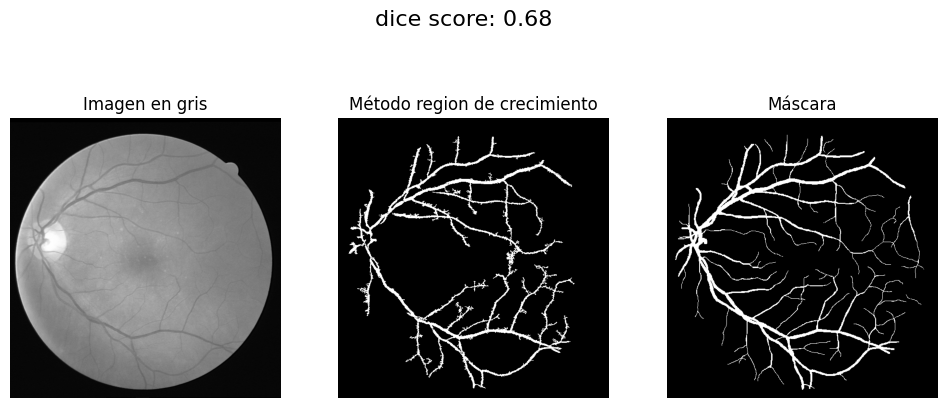

In [204]:
# graficación
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))  # crea figura con 3 subplots
plt.suptitle(f"dice score: {round(dice_score,2)}", fontsize=16)  # título general
plt.tight_layout()  # ajusta espaciado

axes[0].imshow(retina, cmap='gray')           # muestra imagen en grises
axes[0].set_axis_off()                        # oculta ejes
axes[0].set_title('Imagen en gris')                # título del primer subplot

axes[1].imshow(segmented >1, cmap='gray')         # muestra mapa de vesselness
axes[1].set_axis_off()                        # oculta ejes
axes[1].set_title('Método region de crecimiento')      # título del segundo subplot

image_mask = df.iloc[0]['mask_path'] 

img_mask = cv2.imread(image_mask, cv2.IMREAD_GRAYSCALE)

axes[2].imshow(img_mask, cmap='gray')         # muestra mapa de vesselness
axes[2].set_axis_off()                        # oculta ejes
axes[2].set_title('Máscara')      # título del segundo subplot

### 4.4 Segmentación por el método de Bottom-Hat Morphological Filtering + Umbral adaptativo

 ¿Qué hace?
Este enfoque realza estructuras oscuras finas (como vasos) sobre un fondo más brillante, aplicando:

- Bottom-hat filtering: resalta regiones oscuras más pequeñas que el elemento estructurante.
- Umbralización adaptativa: convierte a binario respetando variaciones locales.
- Morfología (opcional): limpia la segmentación final.

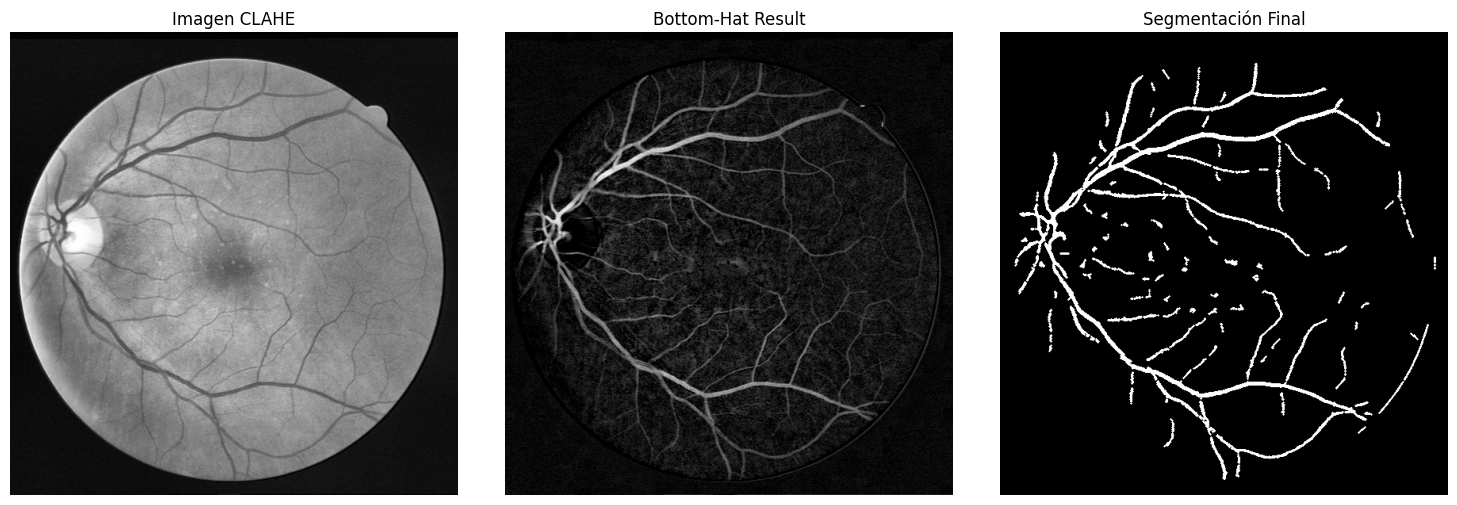

In [241]:
def remove_small_objects(binary_img, min_area=50):
    # Encuentra todos los componentes conectados
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_img, connectivity=4)

    output = np.zeros_like(binary_img)

    for i in range(1, num_labels):  # Ignora fondo (label 0)
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= min_area:
            output[labels == i] = 255

    return output

# 1. Leer imagen y mejorar contraste
image = retina
# 1. Cargar imagen en escala de grises

# 2. CLAHE para mejorar contraste
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(image)

# 3. Filtrado morfológico: Bottom-Hat
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # tamaño ajustable
bottom_hat = cv2.morphologyEx(enhanced, cv2.MORPH_BLACKHAT, kernel)

# 4. Umbralización adaptativa
thresh = cv2.adaptiveThreshold(bottom_hat, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, blockSize=15, C=-5)

# 5. Morfología para limpiar resultado
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

no_noise = remove_small_objects(cleaned, min_area=28)  # Ajusta el umbral

# 6. Mostrar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Imagen CLAHE")
plt.imshow(enhanced, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Bottom-Hat Result")
plt.imshow(bottom_hat, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Segmentación Final")
plt.imshow(no_noise, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

In [246]:
img1 = no_noise > 1  # umbral para binarizar el mapa de vesselness
img2 = img_mask > 0

# Dice = 2 * |A ∩ B| / (|A| + |B|)
intersection = (img1 & img2).sum()
dice_score = 2 * intersection / (img1.sum() + img2.sum())

print("Dice score:", dice_score)

Dice score: 0.7127852395780081


Text(0.5, 1.0, 'Máscara')

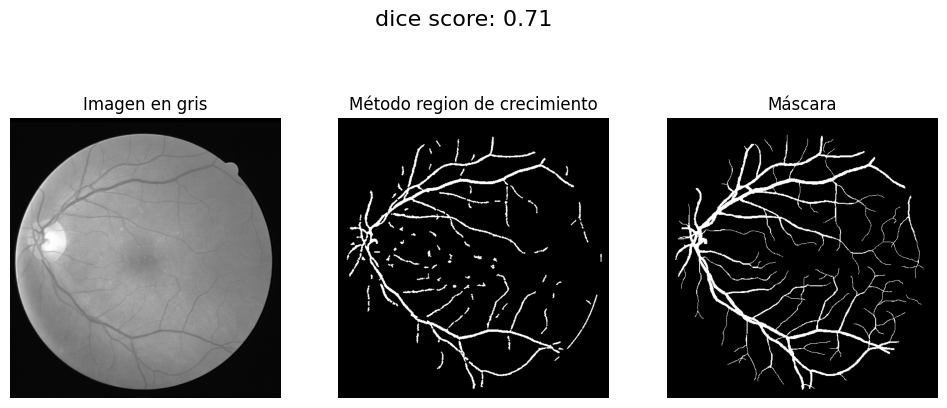

In [247]:
# graficación
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))  # crea figura con 3 subplots
plt.suptitle(f"dice score: {round(dice_score,2)}", fontsize=16)  # título general
plt.tight_layout()  # ajusta espaciado

axes[0].imshow(retina, cmap='gray')           # muestra imagen en grises
axes[0].set_axis_off()                        # oculta ejes
axes[0].set_title('Imagen en gris')                # título del primer subplot

axes[1].imshow(img1, cmap='gray')         # muestra mapa de vesselness
axes[1].set_axis_off()                        # oculta ejes
axes[1].set_title('Método region de crecimiento')      # título del segundo subplot

image_mask = df.iloc[0]['mask_path'] 

img_mask = cv2.imread(image_mask, cv2.IMREAD_GRAYSCALE)

axes[2].imshow(img_mask, cmap='gray')         # muestra mapa de vesselness
axes[2].set_axis_off()                        # oculta ejes
axes[2].set_title('Máscara')      # título del segundo subplot

## 5. Evaluación / Benchmarking

### 5.1 Evaluación de todas las imagenes usando multiotsu

In [262]:
def get_dice_multiotsu(_img, _mask_origin):
    img = cv2.imread(_img, cv2.IMREAD_GRAYSCALE) 
    mask_origin = cv2.imread(_mask_origin, cv2.IMREAD_GRAYSCALE) 

    t0, t1 = ski.filters.threshold_multiotsu(img, classes=3)  # umbrales Otsu multiclase
    mask = img > t0                              # máscara de píxeles mayores al primer umbral
    vessels = ski.filters.sato(img, sigmas=range(1, 10)) * mask  # realza vasos y aplica máscara

    img1 = vessels > 3.5  # umbral para binarizar el mapa de vesselness
    img2 = mask_origin > 0

    # Dice = 2 * |A ∩ B| / (|A| + |B|)
    intersection = (img1 & img2).sum()
    dice_score = 2 * intersection / (img1.sum() + img2.sum())
    return dice_score

# image_gris = df.iloc[0]['image_gris_path']  # obtiene la ruta de la primera imagen en escala de grises
# image_mask = df.iloc[0]['mask_path']  # obtiene la ruta de la máscara

# get_dice_multiotsu(image_gris, image_mask)

In [261]:
# Crear una lista para almacenar los resultados
dice_scores = []

for i in tqdm.tqdm(range(len(train_dir_imgs))):
    image_gris = df.iloc[i]['image_gris_path']
    image_mask = df.iloc[i]['mask_path']
    dice_score = get_dice_multiotsu(image_gris, image_mask)
    dice_scores.append({'image': os.path.basename(image_gris), 'dice_score': dice_score})

# Crear el DataFrame con los resultados
df_multiotsu_dice = pd.DataFrame(dice_scores)
df_multiotsu_dice

100%|██████████| 20/20 [00:12<00:00,  1.61it/s]


,image,dice_score
0,21_training.png,0.624470
1,22_training.png,0.603295
2,23_training.png,0.584185
3,24_training.png,0.648089
4,25_training.png,0.477018
5,26_training.png,0.578971
6,27_training.png,0.618799
7,28_training.png,0.668240
8,29_training.png,0.635218
9,30_training.png,0.490076


### 5.2 Evaluación de todas las imagenes usando regiones de crecimiento

In [263]:
def get_dice_region_growing(_img, _mask_origin):
    img = cv2.imread(_img, cv2.IMREAD_GRAYSCALE) 
    mask_origin = cv2.imread(_mask_origin, cv2.IMREAD_GRAYSCALE) 

    # Aplicar preprocesamiento: CLAHE para mejorar contraste
    clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(50,50))
    enhanced = clahe.apply(img)

    # Definir una semilla (elige un píxel en un vaso, o hazlo automático con binarización)
    seed = (290, 360)  # cambia este valor según tu imagen

    # Segmentar con region growing
    segmented = region_growing(enhanced, seed, threshold=100)

    img1 = segmented > 1  # umbral para binarizar el mapa de vesselness
    img2 = mask_origin > 0

    # Dice = 2 * |A ∩ B| / (|A| + |B|)
    intersection = (img1 & img2).sum()
    dice_score = 2 * intersection / (img1.sum() + img2.sum())
    return dice_score

In [265]:
# Crear una lista para almacenar los resultados
dice_scores = []

for i in tqdm.tqdm(range(len(train_dir_imgs))):
    image_gris = df.iloc[i]['image_gris_path']
    image_mask = df.iloc[i]['mask_path']
    dice_score = get_dice_region_growing(image_gris, image_mask)
    dice_scores.append({'image': os.path.basename(image_gris), 'dice_score': dice_score})

# Crear el DataFrame con los resultados
df_region_growing_dice = pd.DataFrame(dice_scores)
df_region_growing_dice

100%|██████████| 20/20 [00:00<00:00, 42.91it/s]


,image,dice_score
0,21_training.png,0.680109
1,22_training.png,0.025564
2,23_training.png,0.303944
3,24_training.png,0.055647
4,25_training.png,0.011850
5,26_training.png,0.002573
6,27_training.png,0.353199
7,28_training.png,0.020521
8,29_training.png,0.003616
9,30_training.png,0.036801


### 5.3 Evaluación de todas las imagenes usando  Bottom-Hat Morphological Filtering + Umbral

In [269]:
def get_dice_met3(_img, _mask_origin):
    img = cv2.imread(_img, cv2.IMREAD_GRAYSCALE) 
    mask_origin = cv2.imread(_mask_origin, cv2.IMREAD_GRAYSCALE) 

    # 2. CLAHE para mejorar contraste
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(img)

    # 3. Filtrado morfológico: Bottom-Hat
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # tamaño ajustable
    bottom_hat = cv2.morphologyEx(enhanced, cv2.MORPH_BLACKHAT, kernel)

    # 4. Umbralización adaptativa
    thresh = cv2.adaptiveThreshold(bottom_hat, 255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, blockSize=15, C=-5)

    # 5. Morfología para limpiar resultado
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    no_noise = remove_small_objects(cleaned, min_area=28)  # Ajusta el umbral

    img1 = no_noise > 1  # umbral para binarizar el mapa de vesselness
    img2 = mask_origin > 0

    # Dice = 2 * |A ∩ B| / (|A| + |B|)
    intersection = (img1 & img2).sum()
    dice_score = 2 * intersection / (img1.sum() + img2.sum())
    return dice_score

In [270]:
# Crear una lista para almacenar los resultados
dice_scores = []

for i in tqdm.tqdm(range(len(train_dir_imgs))):
    image_gris = df.iloc[i]['image_gris_path']
    image_mask = df.iloc[i]['mask_path']
    dice_score = get_dice_met3(image_gris, image_mask)
    dice_scores.append({'image': os.path.basename(image_gris), 'dice_score': dice_score})

# Crear el DataFrame con los resultados
df_met3_dice = pd.DataFrame(dice_scores)
df_met3_dice

100%|██████████| 20/20 [00:00<00:00, 37.84it/s]


,image,dice_score
0,21_training.png,0.712785
1,22_training.png,0.669777
2,23_training.png,0.540331
3,24_training.png,0.695130
4,25_training.png,0.563248
5,26_training.png,0.667549
6,27_training.png,0.653591
7,28_training.png,0.680120
8,29_training.png,0.689982
9,30_training.png,0.641588


## 6. Despliegue (exportar el modelo y las imágenes segmentadas)

Según los resultados, el método 3 basado en  Bottom-Hat Morphological Filtering + Umbral adaptativo, es el que nos dio mejor dice score. por lo que exportaremos las mascaras generadas en un folder para el dataset de testing

In [271]:
def get_img_met3(_img, _mask_origin):
    img = cv2.imread(_img, cv2.IMREAD_GRAYSCALE) 
    mask_origin = cv2.imread(_mask_origin, cv2.IMREAD_GRAYSCALE) 

    # 2. CLAHE para mejorar contraste
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(img)

    # 3. Filtrado morfológico: Bottom-Hat
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # tamaño ajustable
    bottom_hat = cv2.morphologyEx(enhanced, cv2.MORPH_BLACKHAT, kernel)

    # 4. Umbralización adaptativa
    thresh = cv2.adaptiveThreshold(bottom_hat, 255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, blockSize=15, C=-5)

    # 5. Morfología para limpiar resultado
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    no_noise = remove_small_objects(cleaned, min_area=28)  # Ajusta el umbral

    # img1 = no_noise > 1  # umbral para binarizar el mapa de vesselness
    # img2 = mask_origin > 0

    # # Dice = 2 * |A ∩ B| / (|A| + |B|)
    # intersection = (img1 & img2).sum()
    # dice_score = 2 * intersection / (img1.sum() + img2.sum())
    return no_noise #dice_score

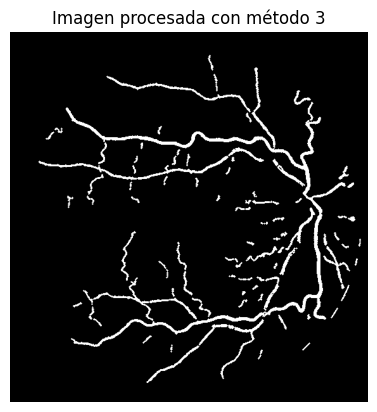

In [273]:
image_gris = df.iloc[1]['image_gris_path']  # obtiene la ruta de la primera imagen en escala de grises
image_mask = df.iloc[1]['mask_path']  # obtiene la ruta de la máscara

imgg = get_img_met3(image_gris, image_mask)
plt.imshow(imgg, cmap='gray')
plt.title("Imagen procesada con método 3")
plt.axis('off')
plt.show()

In [274]:
# Crear directorio de salida para las máscaras segmentadas de test si no existe
output_folder = os.path.join(path, "test", "test", "mask_png")
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Procesar y guardar las segmentaciones para cada imagen de test
for img_path in test_dir_imgs:
    # Obtener el nombre base de la imagen (sin extensión)
    base_name = os.path.splitext(os.path.basename(img_path))[0]
    # Ruta de la imagen en escala de grises
    gris_path = os.path.join(PATH2, base_name + ".png")
    # Procesar la imagen (no se requiere máscara de referencia para test)
    mask_pred = get_img_met3(gris_path, gris_path)
    # Guardar la máscara segmentada en formato PNG
    out_path = os.path.join(output_folder, base_name + "_mask_met3.png")
    cv2.imwrite(out_path, mask_pred)

In [289]:
# Crear directorio de salida para las máscaras segmentadas de test si no existe
output_folder = os.path.join("predicted_masks")
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Procesar y guardar las segmentaciones para cada imagen de test
for img_path in test_dir_imgs:
    # Obtener el nombre base de la imagen (sin extensión)
    base_name = os.path.splitext(os.path.basename(img_path))[0]
    # Ruta de la imagen en escala de grises
    gris_path = os.path.join(PATH2, base_name + ".png")
    # Procesar la imagen (no se requiere máscara de referencia para test)
    mask_pred = get_img_met3(gris_path, gris_path)
    # Guardar la máscara segmentada en formato PNG
    out_path = os.path.join(output_folder, base_name + "_mask_met3.png")
    cv2.imwrite(out_path, mask_pred)

---

# Reporte técnico

## 1. Introducción

El presente reporte técnico resume los resultados obtenidos en el análisis y segmentación de imágenes retinianas del dataset DRIVE mediante el uso de métodos clásicos de procesamiento digital de imágenes. Se aplicaron diversas técnicas con el objetivo de identificar estructuras vasculares relevantes, evaluando su desempeño visualmente.

## 2. Metodología
Se evaluaron los siguientes métodos de segmentación clásica:

- Método 1: Umbralización por multiotsu para detectar bordes conectados.
- Método 2: Region Growing a partir de una semilla localizada en un vaso sanguíneo, con preprocesamiento CLAHE.
- Método 3: Filtro morfológico Bottom-Hat seguido de umbralización adaptativa para resaltar vasos finos.
 


## 3. Resultados y Comparación
Cada uno de los métodos fue evaluado cualitativamente sobre una misma imagen del conjunto DRIVE. Los resultados mostraron que algunos enfoques eran más propensos al ruido, mientras que otros lograban una mejor continuidad y cobertura de los vasos principales y periféricos.

Se observó que el Método 2 presentaba crecimiento excesivo hacia regiones centrales de la retina. El Método 1 era efectivo en bifurcaciones pero con limitada cobertura. El Método 3 mostró buena continuidad pero también sensibilidad al ruido.


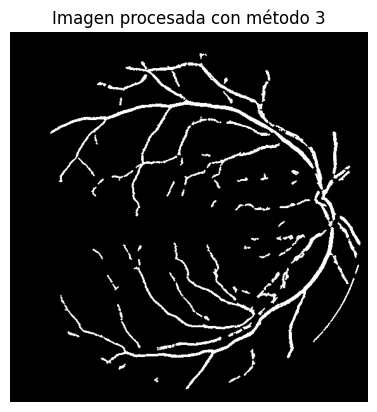

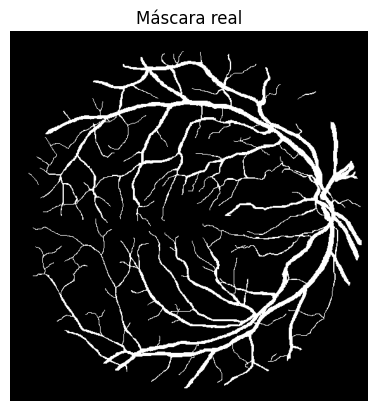

In [284]:
N = np.random.randint(20)

image_gris = df.iloc[N]['image_gris_path']  # obtiene la ruta de la primera imagen en escala de grises
image_mask = df.iloc[N]['mask_path']  # obtiene la ruta de la máscara

imgg = get_img_met3(image_gris, image_mask)
plt.imshow(imgg, cmap='gray')
plt.title("Imagen procesada con método 3")
plt.axis('off')
plt.show()

# mostras mascara real
img_mask = cv2.imread(image_mask, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_mask, cmap='gray')
plt.title("Máscara real")
plt.axis('off')
plt.show()

## 4. Método Seleccionado
El Método 3 (Bottom-Hat Filtering + Umbralización Adaptativa) fue seleccionado como el mejor enfoque basado en los siguientes criterios:

Realce eficaz de vasos finos y oscuros.

Baja sensibilidad al ruido sal y pimienta.

Capacidad de generalización sin requerir selección de semillas ni puntos clave.

Además, se aplicó un proceso de limpieza morfológica para eliminar puntos blancos aislados, logrando así una segmentación más robusta y visualmente coherente.

In [280]:
# Convertir el DataFrame df_met3_dice a una tabla en formato markdown
print(df_met3_dice.to_markdown(index=False))

| image           |   dice_score |
|:----------------|-------------:|
| 21_training.png |     0.712785 |
| 22_training.png |     0.669777 |
| 23_training.png |     0.540331 |
| 24_training.png |     0.69513  |
| 25_training.png |     0.563248 |
| 26_training.png |     0.667549 |
| 27_training.png |     0.653591 |
| 28_training.png |     0.68012  |
| 29_training.png |     0.689982 |
| 30_training.png |     0.641588 |
| 31_training.png |     0.630206 |
| 32_training.png |     0.708739 |
| 33_training.png |     0.718971 |
| 34_training.png |     0.570548 |
| 35_training.png |     0.731138 |
| 36_training.png |     0.697421 |
| 37_training.png |     0.702646 |
| 38_training.png |     0.722871 |
| 39_training.png |     0.715081 |
| 40_training.png |     0.722116 |


El promedio de los dice score fue de 67%

In [287]:
df_met3_dice.describe()

,dice_score
count,20.000000
mean,0.671692
std,0.056509
min,0.540331
25%,0.650590
50%,0.692556
75%,0.713359
max,0.731138


Las imagenes segmentadas se exportaron al folder **predicted_masks**

![](./imgs/tree_folder_dataset3.png)

## 5. Conclusiones
Los métodos clásicos aún ofrecen soluciones efectivas para la segmentación de vasos retinianos, especialmente en entornos con recursos limitados. El filtro Bottom-Hat combinado con técnicas morfológicas demostró ser una herramienta poderosa para este propósito. Se recomienda considerar este enfoque como base para sistemas de diagnóstico automatizados cuando no se disponga de redes neuronales profundas.

